In [1]:
# Sample API
import flowx
import simulation
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 80
xmin, xmax = -2.5, 2.5
ymin, ymax = -9.0, 1.0

# Define cell-centered variable names
center_vars   = ['pres', 'divv', 'ibmf']
face_vars     = ['velc', 'hvar', 'ibmf']
ins_vars      = ['velc', 'hvar', 'divv', 'pres']
poisson_vars  = ['pres', 'divv']
imbound_vars  = ['ibmf', 'velc']

scalar_info   = dict(tmax = 8, dt = 0.01, Re = 100.0)

simulation_info = dict(time_stepping = 'ab2', 
                       poisson_solver = 'serial_lu', 
                       maxiter = 2000,
                       tol = 1e-10,
                       with_ib = True,
                       mapping_type = 'ann',
                       ntrees = 20,
                       nquery_trees = 1,
                       nquery_trace = 2)

particle_info = [dict(input='HDF5', file='sm_body.00001.h5', vel = [0.0,-1.0])]

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_center = dict(pres = ['neumann', 'neumann', 'neumann', 'neumann'])
bc_val_center  = dict(pres = [0.0, 0.0, 0.0, 0.0])

bc_type_facex = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facex  = dict(velc = [0.0, 0.0, 0.0, 0.0])

bc_type_facey = dict(velc = ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet'])
bc_val_facey  = dict(velc =[0.0, 0.0, 0.0, 0.0])

# Create the grid and data
gridc, gridx, gridy, scalars, particles = flowx.serial.domain_main(nx, ny, xmin, xmax, ymin, ymax,
                                              center_vars, face_vars, scalar_info, particle_info, 
                                              bc_type_center=bc_type_center, bc_val_center=bc_val_center,
                                              bc_type_facex=bc_type_facex, bc_val_facex=bc_val_facex,
                                              bc_type_facey=bc_type_facey, bc_val_facey=bc_val_facey)

domain_data_struct = [gridc, gridx, gridy, scalars, particles]

poisson = flowx.poisson_main(gridc, poisson_vars, simulation_info)

imbound = flowx.imbound_main(domain_data_struct, imbound_vars, simulation_info)

ins = flowx.ins_main(poisson, imbound, domain_data_struct, ins_vars, simulation_info)

Level Set Mapping Time:  0.29366016387939453
------------ Time = 0.01 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.791654612266284e-12
Total poisson time : 0.0009210109710693359
Total INS time : 0.0022208690643310547
Max, Min, U   : 0.5042397541052344, -0.5042397541052347
Max, Min, V   : 0.40169913581524636, -0.5864431329190852
Max, Min, P   : 18.280248943845326, -32.44357977387638
Max, Min, DIV : 1.609823385706477e-14, -1.3766765505351941e-14


Level Set Mapping Time:  0.28974294662475586
------------ Time = 0.02 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.393438561119343e-12
Total poisson time : 0.0007009506225585938
Total INS time : 0.002124786376953125
Max, Min, U   : 0.7886325262716087, -0.7886325262716092
Max, Min, V   : 0.615196027045557, -0.7961761813969629
Max, Min, P   : 10.892774128285291, -19.271549502413368
Max, Min, DIV : 1.1546319456101628e-14, -8.104628079763643e-15


Level Set Mapping Time:  0.3

Level Set Mapping Time:  0.32297277450561523
------------ Time = 0.18000000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.708199526916315e-13
Total poisson time : 0.0007297992706298828
Total INS time : 0.0018320083618164062
Max, Min, U   : 0.9589188338143265, -0.9589188338143265
Max, Min, V   : 0.9260152908546815, -1.0604656042660787
Max, Min, P   : 0.972547170079427, -2.2272527895157923
Max, Min, DIV : 1.3877787807814457e-15, -2.220446049250313e-15


Level Set Mapping Time:  0.37035322189331055
------------ Time = 0.19000000000000003 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0914483197438007e-13
Total poisson time : 0.0008540153503417969
Total INS time : 0.0019989013671875
Max, Min, U   : 0.9548622791629757, -0.9548622791629757
Max, Min, V   : 0.9130991680289556, -1.05436261483865
Max, Min, P   : 0.9582063817287753, -2.094172167793272
Max, Min, DIV : 1.9984014443252818e-15, -1.5681900222830336e-15


L

Level Set Mapping Time:  0.2901780605316162
------------ Time = 0.35000000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.4338898322272787e-13
Total poisson time : 0.0006914138793945312
Total INS time : 0.001730203628540039
Max, Min, U   : 0.8864704420879167, -0.8864704420879169
Max, Min, V   : 0.700252527322327, -1.054704241442523
Max, Min, P   : 0.24218673991401862, -1.1941767371180276
Max, Min, DIV : 1.3600232051658168e-15, -1.429412144204889e-15


Level Set Mapping Time:  0.30941295623779297
------------ Time = 0.36000000000000015 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.699174981484854e-13
Total poisson time : 0.0007150173187255859
Total INS time : 0.0017442703247070312
Max, Min, U   : 0.8817081275204823, -0.8817081275204824
Max, Min, V   : 0.686054270811576, -1.056634520799793
Max, Min, P   : 0.895549498305853, -1.0934527710220914
Max, Min, DIV : 1.1102230246251565e-15, -9.159339953157541e-16


L

Level Set Mapping Time:  0.2822897434234619
------------ Time = 0.5200000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.7738698029106255e-13
Total poisson time : 0.0006771087646484375
Total INS time : 0.0016813278198242188
Max, Min, U   : 0.789468792673608, -0.7894687926736081
Max, Min, V   : 0.5570402268221821, -1.1030521265325368
Max, Min, P   : 0.7742220897659445, -1.155063619383321
Max, Min, DIV : 1.3322676295501878e-15, -1.1102230246251565e-15


Level Set Mapping Time:  0.39402079582214355
------------ Time = 0.5300000000000002 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.3239500484400634e-13
Total poisson time : 0.0006802082061767578
Total INS time : 0.001711130142211914
Max, Min, U   : 0.7827365882494889, -0.782736588249489
Max, Min, V   : 0.5522810235155432, -1.1105079952115504
Max, Min, P   : 1.1877261419353193, -1.0503898718833573
Max, Min, DIV : 1.5543122344752192e-15, -1.4432899320127035e-15



Level Set Mapping Time:  0.317119836807251
------------ Time = 0.6900000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0235674858803456e-13
Total poisson time : 0.0006818771362304688
Total INS time : 0.0016932487487792969
Max, Min, U   : 0.7487457262954169, -0.748745726295417
Max, Min, V   : 0.5242291545696401, -1.1660645527496982
Max, Min, P   : 0.8099178659904944, -1.7106265915734913
Max, Min, DIV : 1.1102230246251565e-15, -1.3322676295501878e-15


Level Set Mapping Time:  0.29572391510009766
------------ Time = 0.7000000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.196175589866914e-13
Total poisson time : 0.0006809234619140625
Total INS time : 0.0016989707946777344
Max, Min, U   : 0.7450918265725055, -0.7450918265725056
Max, Min, V   : 0.522464405168935, -1.1760340601077057
Max, Min, P   : 0.4013245026310477, -1.4126765621846413
Max, Min, DIV : 8.881784197001252e-16, -1.5681900222830336e-15




Level Set Mapping Time:  0.3071439266204834
------------ Time = 0.8600000000000005 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6003757026547367e-13
Total poisson time : 0.0006821155548095703
Total INS time : 0.0016980171203613281
Max, Min, U   : 0.6928069271345364, -0.6928069271345363
Max, Min, V   : 0.5093085112379865, -1.2328979408830145
Max, Min, P   : 0.8581203199782789, -0.9337923682979645
Max, Min, DIV : 1.457167719820518e-15, -9.228728892196614e-16


Level Set Mapping Time:  0.3511621952056885
------------ Time = 0.8700000000000006 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.5725853776774345e-13
Total poisson time : 0.0006837844848632812
Total INS time : 0.0017008781433105469
Max, Min, U   : 0.689061196523659, -0.6890611965236589
Max, Min, V   : 0.509385176637617, -1.2425868473884214
Max, Min, P   : 0.6976044511362053, -0.8808914699804357
Max, Min, DIV : 1.2212453270876722e-15, -1.3322676295501878e-15




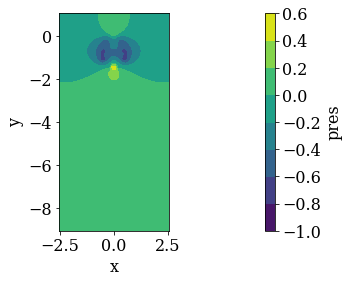

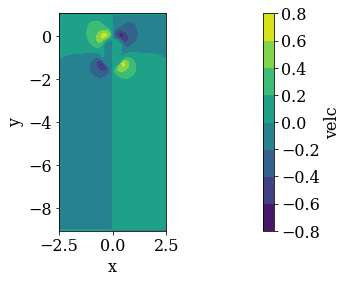

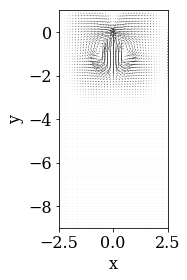

Level Set Mapping Time:  0.3722851276397705
------------ Time = 1.0100000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.606674751334541e-13
Total poisson time : 0.0008170604705810547
Total INS time : 0.002235889434814453
Max, Min, U   : 0.7039850762771969, -0.703985076277197
Max, Min, V   : 0.49829174581203356, -1.303250063357792
Max, Min, P   : 1.545525157408171, -1.7419489765217315
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15


Level Set Mapping Time:  0.32707881927490234
------------ Time = 1.0200000000000007 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.508107342863116e-13
Total poisson time : 0.0008199214935302734
Total INS time : 0.0021812915802001953
Max, Min, U   : 0.7276341416929438, -0.7276341416929439
Max, Min, V   : 0.4975227753277111, -1.3011920691191683
Max, Min, P   : 0.7739783599248425, -1.0008118639218593
Max, Min, DIV : 1.7763568394002505e-15, -1.4432899320127035e-15




Level Set Mapping Time:  0.2814621925354004
------------ Time = 1.1800000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.532731007902028e-13
Total poisson time : 0.0006818771362304688
Total INS time : 0.0016989707946777344
Max, Min, U   : 0.6536011659916364, -0.6536011659916364
Max, Min, V   : 0.4858103961058167, -1.3542444671014982
Max, Min, P   : 0.8105279101691472, -1.6752346070341935
Max, Min, DIV : 1.2212453270876722e-15, -1.4432899320127035e-15


Level Set Mapping Time:  0.30436015129089355
------------ Time = 1.1900000000000008 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.913546821671352e-13
Total poisson time : 0.0007262229919433594
Total INS time : 0.0017609596252441406
Max, Min, U   : 0.6564748558952772, -0.6564748558952773
Max, Min, V   : 0.4849187981065079, -1.3515777942803253
Max, Min, P   : 0.8275162331386687, -1.5544603654883693
Max, Min, DIV : 1.6341095143701523e-15, -1.3322676295501878e-15

Level Set Mapping Time:  0.28627467155456543
------------ Time = 1.350000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.533482834849094e-13
Total poisson time : 0.0007259845733642578
Total INS time : 0.0017397403717041016
Max, Min, U   : 0.6525669703078886, -0.6525669703078886
Max, Min, V   : 0.4734885641925026, -1.3896230361258277
Max, Min, P   : 0.255319684697746, -0.9314148086942843
Max, Min, DIV : 1.3322676295501878e-15, -1.2212453270876722e-15


Level Set Mapping Time:  0.29429197311401367
------------ Time = 1.360000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.591041961285546e-13
Total poisson time : 0.0006809234619140625
Total INS time : 0.0017008781433105469
Max, Min, U   : 0.6497615140636325, -0.6497615140636326
Max, Min, V   : 0.47330489138804727, -1.390947213410636
Max, Min, P   : 0.8565003534271312, -0.8522008654677223
Max, Min, DIV : 1.7763568394002505e-15, -1.9984014443252818e-15



Level Set Mapping Time:  0.34460997581481934
------------ Time = 1.5200000000000011 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.76295873062962e-13
Total poisson time : 0.0006899833679199219
Total INS time : 0.0017399787902832031
Max, Min, U   : 0.7181045579404957, -0.7181045579404954
Max, Min, V   : 0.4640689847959596, -1.4220730997886628
Max, Min, P   : 0.7606078854541825, -0.9544280652288498
Max, Min, DIV : 1.3739009929736312e-15, -1.7763568394002505e-15


Level Set Mapping Time:  0.35478806495666504
------------ Time = 1.5300000000000011 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.78364697689805e-13
Total poisson time : 0.0006878376007080078
Total INS time : 0.0017390251159667969
Max, Min, U   : 0.6819733410543419, -0.6819733410543418
Max, Min, V   : 0.4631007676198579, -1.4275400421988245
Max, Min, P   : 1.1911899411001796, -0.838100890815807
Max, Min, DIV : 1.3183898417423734e-15, -1.3322676295501878e-15



Level Set Mapping Time:  0.3019521236419678
------------ Time = 1.6900000000000013 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9743465380644033e-13
Total poisson time : 0.0007407665252685547
Total INS time : 0.001795053482055664
Max, Min, U   : 0.6531713066317354, -0.6531713066317352
Max, Min, V   : 0.45393003176894253, -1.449753055495462
Max, Min, P   : 0.8124638896624526, -1.4927696074193488
Max, Min, DIV : 1.915134717478395e-15, -1.6341095143701523e-15


Level Set Mapping Time:  0.30008912086486816
------------ Time = 1.7000000000000013 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.057590211345879e-13
Total poisson time : 0.0007081031799316406
Total INS time : 0.0017840862274169922
Max, Min, U   : 0.6546228053697545, -0.6546228053697543
Max, Min, V   : 0.45397130602327196, -1.4531656452057733
Max, Min, P   : 0.3977454716921452, -1.2385990931221817
Max, Min, DIV : 1.6653345369377348e-15, -1.27675647831893e-15



Level Set Mapping Time:  0.3339681625366211
------------ Time = 1.8600000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.3691884808804795e-13
Total poisson time : 0.000720977783203125
Total INS time : 0.0017468929290771484
Max, Min, U   : 0.6460145178389876, -0.6460145178389877
Max, Min, V   : 0.4475757124353632, -1.465587337237973
Max, Min, P   : 0.8457090237903253, -0.8131236942145724
Max, Min, DIV : 1.3322676295501878e-15, -1.5543122344752192e-15


Level Set Mapping Time:  0.28372907638549805
------------ Time = 1.8700000000000014 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.58039220850653e-13
Total poisson time : 0.0006849765777587891
Total INS time : 0.0017018318176269531
Max, Min, U   : 0.6421539243746133, -0.6421539243746133
Max, Min, V   : 0.4474247972744682, -1.4667252431261735
Max, Min, P   : 0.6983694022324101, -0.7548738503060988
Max, Min, DIV : 1.4432899320127035e-15, -1.609823385706477e-15




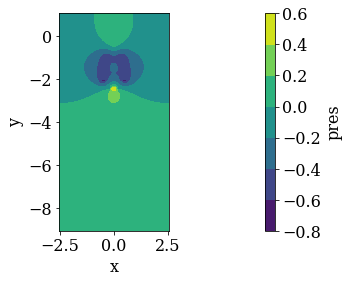

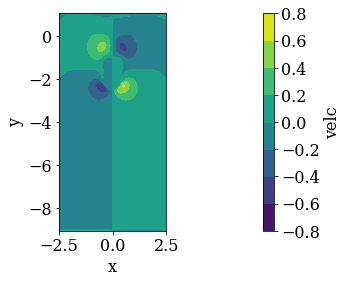

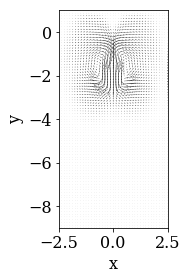

Level Set Mapping Time:  0.2935030460357666
------------ Time = 2.010000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.603248752078538e-13
Total poisson time : 0.0007219314575195312
Total INS time : 0.0017540454864501953
Max, Min, U   : 0.690244762684555, -0.690244762684555
Max, Min, V   : 0.4408156277791467, -1.470379661421977
Max, Min, P   : 1.5039536777311213, -1.6619495585965278
Max, Min, DIV : 1.4432899320127035e-15, -1.5543122344752192e-15


Level Set Mapping Time:  0.38077211380004883
------------ Time = 2.020000000000001 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.841048316442023e-13
Total poisson time : 0.0007181167602539062
Total INS time : 0.0017459392547607422
Max, Min, U   : 0.7120450518407441, -0.7120450518407441
Max, Min, V   : 0.43995001469937134, -1.4711596286964945
Max, Min, P   : 0.7678020505514958, -0.9171677424898848
Max, Min, DIV : 1.9984014443252818e-15, -1.6375789613221059e-15


L

Level Set Mapping Time:  0.38500499725341797
------------ Time = 2.1799999999999975 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.7267824433656024e-13
Total poisson time : 0.0006968975067138672
Total INS time : 0.0017421245574951172
Max, Min, U   : 0.6484473989528363, -0.6484473989528363
Max, Min, V   : 0.4342152059960676, -1.4735277297606693
Max, Min, P   : 0.801560452908634, -1.5579544451491751
Max, Min, DIV : 1.5543122344752192e-15, -1.5543122344752192e-15


Level Set Mapping Time:  0.3526458740234375
------------ Time = 2.1899999999999973 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9618574878775234e-13
Total poisson time : 0.0006830692291259766
Total INS time : 0.0017039775848388672
Max, Min, U   : 0.650848131471139, -0.650848131471139
Max, Min, V   : 0.43456164960299093, -1.4729956056050337
Max, Min, P   : 0.8181706665578443, -1.437439618047152
Max, Min, DIV : 1.27675647831893e-15, -1.5543122344752192e-15




Level Set Mapping Time:  0.2943100929260254
------------ Time = 2.349999999999994 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6705065090587917e-13
Total poisson time : 0.0006840229034423828
Total INS time : 0.001886129379272461
Max, Min, U   : 0.646430153786701, -0.6464301537867008
Max, Min, V   : 0.42956165450606, -1.4690923976897772
Max, Min, P   : 0.24944128788586897, -0.8589722688729294
Max, Min, DIV : 1.4155343563970746e-15, -1.3322676295501878e-15


Level Set Mapping Time:  0.28761887550354004
------------ Time = 2.3599999999999937 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.6498270509876567e-13
Total poisson time : 0.0006918907165527344
Total INS time : 0.001706838607788086
Max, Min, U   : 0.6433608160471593, -0.6433608160471591
Max, Min, V   : 0.42915963325921686, -1.4671956545419307
Max, Min, P   : 0.8561676198080365, -0.7695667127978135
Max, Min, DIV : 1.3322676295501878e-15, -1.6341095143701523e-15



Level Set Mapping Time:  0.2985069751739502
------------ Time = 2.5199999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0187790731495627e-13
Total poisson time : 0.0007259845733642578
Total INS time : 0.0017900466918945312
Max, Min, U   : 0.7078418028047595, -0.7078418028047595
Max, Min, V   : 0.4263977772015618, -1.4614888984856178
Max, Min, P   : 0.7840940684534862, -0.8802179036228608
Max, Min, DIV : 1.5543122344752192e-15, -1.384309333829492e-15


Level Set Mapping Time:  0.30232882499694824
------------ Time = 2.52999999999999 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.7203492316685704e-13
Total poisson time : 0.0028929710388183594
Total INS time : 0.00457000732421875
Max, Min, U   : 0.6715838352724162, -0.6715838352724162
Max, Min, V   : 0.42599072131328697, -1.459083727897813
Max, Min, P   : 1.2063666102771482, -0.7721479354742173
Max, Min, DIV : 1.7763568394002505e-15, -1.609823385706477e-15


L

Level Set Mapping Time:  0.34703707695007324
------------ Time = 2.6899999999999866 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2517339846612264e-13
Total poisson time : 0.0006940364837646484
Total INS time : 0.00173187255859375
Max, Min, U   : 0.6491442648168871, -0.6491442648168873
Max, Min, V   : 0.42354207422279566, -1.4596149781448473
Max, Min, P   : 0.8416775748234635, -1.3796572052136247
Max, Min, DIV : 1.7763568394002505e-15, -1.4432899320127035e-15


Level Set Mapping Time:  0.3335590362548828
------------ Time = 2.6999999999999864 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.353468694510397e-13
Total poisson time : 0.0007040500640869141
Total INS time : 0.0017580986022949219
Max, Min, U   : 0.6503224722607006, -0.6503224722607008
Max, Min, V   : 0.4235524091763511, -1.4607454760192033
Max, Min, P   : 0.4305643649391902, -1.136277412545665
Max, Min, DIV : 1.6653345369377348e-15, -1.9984014443252818e-15


Level Set Mapping Time:  0.2813129425048828
------------ Time = 2.859999999999983 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7571991920031055e-13
Total poisson time : 0.0006878376007080078
Total INS time : 0.0017290115356445312
Max, Min, U   : 0.6414095946582387, -0.6414095946582387
Max, Min, V   : 0.4216616609956748, -1.45601145879553
Max, Min, P   : 0.8707894228700058, -0.731751638726875
Max, Min, DIV : 1.609823385706477e-15, -1.4432899320127035e-15


Level Set Mapping Time:  0.28259801864624023
------------ Time = 2.869999999999983 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7640416078967205e-13
Total poisson time : 0.0006859302520751953
Total INS time : 0.0017023086547851562
Max, Min, U   : 0.6373724901775855, -0.6373724901775855
Max, Min, V   : 0.42168831630803644, -1.456040955751198
Max, Min, P   : 0.7233992812985859, -0.676704813853641
Max, Min, DIV : 1.4432899320127035e-15, -1.7763568394002505e-15


Le

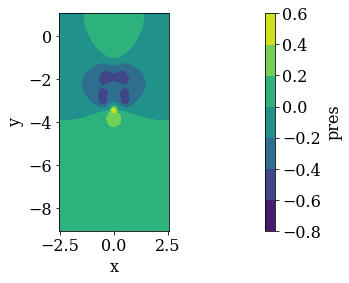

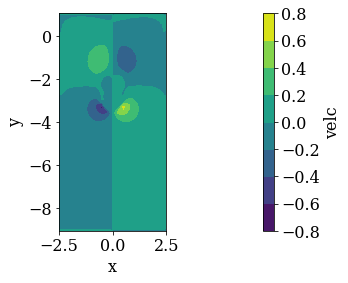

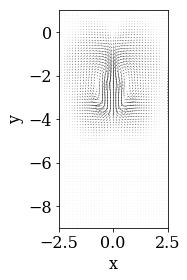

Level Set Mapping Time:  0.3343198299407959
------------ Time = 3.00999999999998 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.074436369070559e-13
Total poisson time : 0.0012001991271972656
Total INS time : 0.002975940704345703
Max, Min, U   : 0.6838296364569113, -0.6838296364569112
Max, Min, V   : 0.419509525833765, -1.4506747447753607
Max, Min, P   : 1.5471596771814984, -1.5638198092243094
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15


Level Set Mapping Time:  0.34082889556884766
------------ Time = 3.0199999999999796 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0795240918928045e-13
Total poisson time : 0.0006840229034423828
Total INS time : 0.0017840862274169922
Max, Min, U   : 0.7048004824199601, -0.7048004824199601
Max, Min, V   : 0.41924822938191314, -1.450675270443565
Max, Min, P   : 0.8054291470528095, -0.8440612771197896
Max, Min, DIV : 1.4432899320127035e-15, -1.5265566588595902e-15




Level Set Mapping Time:  0.28173375129699707
------------ Time = 3.179999999999976 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9801123813753946e-13
Total poisson time : 0.0009047985076904297
Total INS time : 0.001992940902709961
Max, Min, U   : 0.6456910867658734, -0.6456910867658734
Max, Min, V   : 0.4168545815860758, -1.4449213638589515
Max, Min, P   : 0.85621418273901, -1.4446389538560471
Max, Min, DIV : 1.5543122344752192e-15, -1.8457457784393227e-15


Level Set Mapping Time:  0.28920602798461914
------------ Time = 3.189999999999976 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.328047181968812e-13
Total poisson time : 0.0007827281951904297
Total INS time : 0.001817941665649414
Max, Min, U   : 0.6478641951191059, -0.6478641951191059
Max, Min, V   : 0.4166645516875698, -1.444583880976901
Max, Min, P   : 0.8716544601111175, -1.3250415750953326
Max, Min, DIV : 1.1934897514720433e-15, -1.2212453270876722e-15


Le

Level Set Mapping Time:  0.3240780830383301
------------ Time = 3.3499999999999726 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.7566045758099406e-13
Total poisson time : 0.0006868839263916016
Total INS time : 0.0017080307006835938
Max, Min, U   : 0.6431477071528209, -0.643147707152821
Max, Min, V   : 0.4151415716653541, -1.4378964703463337
Max, Min, P   : 0.27764649649641016, -0.793181666609424
Max, Min, DIV : 1.1934897514720433e-15, -1.5543122344752192e-15


Level Set Mapping Time:  0.33840084075927734
------------ Time = 3.3599999999999723 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.77788023012748e-13
Total poisson time : 0.0006968975067138672
Total INS time : 0.001725912094116211
Max, Min, U   : 0.639942302546021, -0.6399423025460211
Max, Min, V   : 0.4151204571764947, -1.4370088550934756
Max, Min, P   : 0.881066802493541, -0.7046505990658658
Max, Min, DIV : 1.5543122344752192e-15, -1.5543122344752192e-15


L

Level Set Mapping Time:  0.28139400482177734
------------ Time = 3.519999999999969 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.05889895113935e-13
Total poisson time : 0.0006811618804931641
Total INS time : 0.0016949176788330078
Max, Min, U   : 0.7025417372327643, -0.7025417372327644
Max, Min, V   : 0.4129816810947645, -1.4301710123771163
Max, Min, P   : 0.8173276131966908, -0.8212330623964774
Max, Min, DIV : 1.6688039838896884e-15, -1.5543122344752192e-15


Level Set Mapping Time:  0.2826099395751953
------------ Time = 3.5299999999999687 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0917137830723793e-13
Total poisson time : 0.0006840229034423828
Total INS time : 0.0017011165618896484
Max, Min, U   : 0.6662289898732412, -0.6662289898732413
Max, Min, V   : 0.4126250535822601, -1.4292311425758897
Max, Min, P   : 1.2236990303829558, -0.7289212204117341
Max, Min, DIV : 1.394717674685353e-15, -1.394717674685353e-15




Level Set Mapping Time:  0.2831239700317383
------------ Time = 3.6899999999999653 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.527970894103455e-13
Total poisson time : 0.000682830810546875
Total INS time : 0.0017018318176269531
Max, Min, U   : 0.646888370824493, -0.6468883708244931
Max, Min, V   : 0.4109618468246809, -1.4239860705858287
Max, Min, P   : 0.8686643982779197, -1.3098580251270628
Max, Min, DIV : 1.27675647831893e-15, -1.970645868709653e-15


Level Set Mapping Time:  0.2792658805847168
------------ Time = 3.699999999999965 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.462557001479298e-13
Total poisson time : 0.0006771087646484375
Total INS time : 0.0016930103302001953
Max, Min, U   : 0.647922061437652, -0.6479220614376521
Max, Min, V   : 0.41098206998726816, -1.4230505674858513
Max, Min, P   : 0.4488069755295507, -1.0825847577595993
Max, Min, DIV : 1.4432899320127035e-15, -1.5543122344752192e-15


Leve

Level Set Mapping Time:  0.2813148498535156
------------ Time = 3.8599999999999617 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.905248314548393e-13
Total poisson time : 0.0006937980651855469
Total INS time : 0.0017371177673339844
Max, Min, U   : 0.63882396379345, -0.63882396379345
Max, Min, V   : 0.40992082116257667, -1.416689110943756
Max, Min, P   : 0.8796866786993506, -0.6935560654885059
Max, Min, DIV : 1.609823385706477e-15, -1.7208456881689926e-15


Level Set Mapping Time:  0.28288888931274414
------------ Time = 3.8699999999999615 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.1720085373020736e-13
Total poisson time : 0.0006859302520751953
Total INS time : 0.0017027854919433594
Max, Min, U   : 0.6346895002794823, -0.6346895002794823
Max, Min, V   : 0.40992455939750855, -1.4165731349941018
Max, Min, P   : 0.7247868323694896, -0.6476721577825364
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15




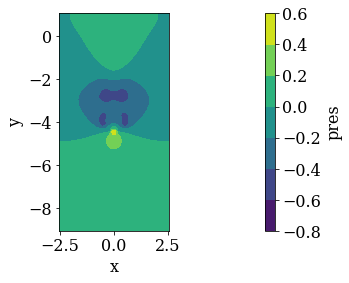

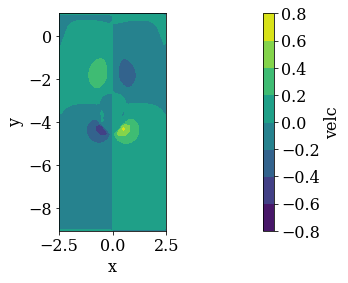

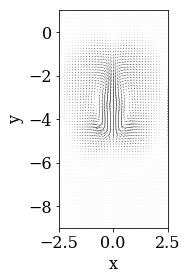

Level Set Mapping Time:  0.3763449192047119
------------ Time = 4.009999999999959 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.190152866157785e-13
Total poisson time : 0.0006897449493408203
Total INS time : 0.001967906951904297
Max, Min, U   : 0.6803108900038012, -0.6803108900038011
Max, Min, V   : 0.4101350871357738, -1.4120029720231357
Max, Min, P   : 1.5274040212860285, -1.5539857214467616
Max, Min, DIV : 1.4988010832439613e-15, -1.4710455076283324e-15


Level Set Mapping Time:  0.29198598861694336
------------ Time = 4.019999999999959 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.118439662900647e-13
Total poisson time : 0.0007669925689697266
Total INS time : 0.0020492076873779297
Max, Min, U   : 0.700837791127706, -0.7008377911277058
Max, Min, V   : 0.41009226028884, -1.4111699171736571
Max, Min, P   : 0.8154888551232139, -0.8148756328915711
Max, Min, DIV : 1.7208456881689926e-15, -1.582067810090848e-15


Leve

Level Set Mapping Time:  0.39744019508361816
------------ Time = 4.179999999999955 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.459535962027806e-13
Total poisson time : 0.0025682449340820312
Total INS time : 0.004007816314697266
Max, Min, U   : 0.6440919759974599, -0.64409197599746
Max, Min, V   : 0.4102367996459749, -1.4069064634305075
Max, Min, P   : 0.8497966665639355, -1.4193949627262499
Max, Min, DIV : 1.6375789613221059e-15, -1.7763568394002505e-15


Level Set Mapping Time:  0.3481440544128418
------------ Time = 4.189999999999955 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2951722556094557e-13
Total poisson time : 0.0010790824890136719
Total INS time : 0.002718210220336914
Max, Min, U   : 0.6461399145360442, -0.6461399145360445
Max, Min, V   : 0.41021349735300006, -1.4071294361656868
Max, Min, P   : 0.8702546712146217, -1.294650244590961
Max, Min, DIV : 1.8318679906315083e-15, -1.6653345369377348e-15


Le

Level Set Mapping Time:  0.28712987899780273
------------ Time = 4.349999999999952 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9823417710427247e-13
Total poisson time : 0.0006947517395019531
Total INS time : 0.0017910003662109375
Max, Min, U   : 0.6412503390746797, -0.6412503390746797
Max, Min, V   : 0.41034940173323625, -1.4018538102221667
Max, Min, P   : 0.28604106563850157, -0.7643316473369388
Max, Min, DIV : 1.457167719820518e-15, -1.3322676295501878e-15


Level Set Mapping Time:  0.31163811683654785
------------ Time = 4.3599999999999515 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.83130821503843e-13
Total poisson time : 0.0008220672607421875
Total INS time : 0.002368927001953125
Max, Min, U   : 0.6379675790413498, -0.6379675790413498
Max, Min, V   : 0.41040271804625605, -1.4017287455465413
Max, Min, P   : 0.8848101607485181, -0.6790670306917043
Max, Min, DIV : 1.887379141862766e-15, -1.8318679906315083e-15

Level Set Mapping Time:  0.3047759532928467
------------ Time = 4.519999999999948 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.107485671056973e-13
Total poisson time : 0.0009860992431640625
Total INS time : 0.0020551681518554688
Max, Min, U   : 0.6995457188940873, -0.6995457188940873
Max, Min, V   : 0.4103945091757545, -1.396976045152009
Max, Min, P   : 0.8296633274153385, -0.7945111394349987
Max, Min, DIV : 1.6930901125533637e-15, -1.5543122344752192e-15


Level Set Mapping Time:  0.32053303718566895
------------ Time = 4.529999999999948 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.066626363555639e-13
Total poisson time : 0.0011260509490966797
Total INS time : 0.0022640228271484375
Max, Min, U   : 0.6632056473387253, -0.6632056473387254
Max, Min, V   : 0.41039123082212164, -1.396812691218792
Max, Min, P   : 1.2303536937027129, -0.7077683746878294
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15




Level Set Mapping Time:  0.29242992401123047
------------ Time = 4.689999999999944 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.2643956451847776e-13
Total poisson time : 0.0007100105285644531
Total INS time : 0.0018968582153320312
Max, Min, U   : 0.6455714609943892, -0.6455714609943892
Max, Min, V   : 0.4104022486095787, -1.3926192957213557
Max, Min, P   : 0.876336610129991, -1.2783014166807303
Max, Min, DIV : 1.7486012637846216e-15, -1.7763568394002505e-15


Level Set Mapping Time:  0.3085629940032959
------------ Time = 4.699999999999944 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.587328655277709e-13
Total poisson time : 0.0007040500640869141
Total INS time : 0.001725912094116211
Max, Min, U   : 0.6465227962369455, -0.6465227962369455
Max, Min, V   : 0.4104271619963607, -1.3924118189888917
Max, Min, P   : 0.47050307571239786, -1.0411317487855816
Max, Min, DIV : 1.6653345369377348e-15, -1.7208456881689926e-15



Level Set Mapping Time:  0.3237190246582031
------------ Time = 4.859999999999941 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.095175990237093e-13
Total poisson time : 0.0007169246673583984
Total INS time : 0.0017428398132324219
Max, Min, U   : 0.6373208126797207, -0.6373208126797206
Max, Min, V   : 0.4103933289009942, -1.3875125953825451
Max, Min, P   : 0.890456774221103, -0.6663837358641903
Max, Min, DIV : 1.4988010832439613e-15, -1.7763568394002505e-15


Level Set Mapping Time:  0.30504393577575684
------------ Time = 4.869999999999941 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.164850507393478e-13
Total poisson time : 0.0006940364837646484
Total INS time : 0.0018000602722167969
Max, Min, U   : 0.6331296599165084, -0.6331296599165083
Max, Min, V   : 0.4104183716436192, -1.3871481100332106
Max, Min, P   : 0.7396904780261274, -0.6173027994517307
Max, Min, DIV : 1.7208456881689926e-15, -1.609823385706477e-15


L

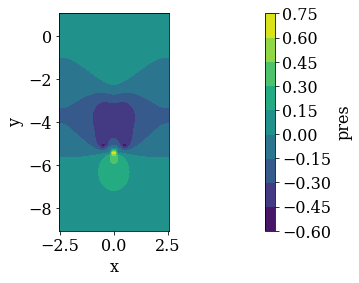

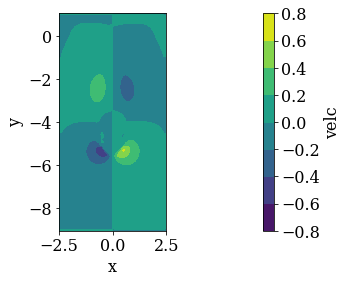

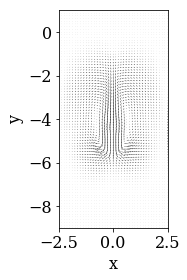

Level Set Mapping Time:  0.29267382621765137
------------ Time = 5.009999999999938 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.332334261976487e-13
Total poisson time : 0.0007069110870361328
Total INS time : 0.0018291473388671875
Max, Min, U   : 0.6783080446839058, -0.6783080446839058
Max, Min, V   : 0.41017695502801865, -1.3829086610870316
Max, Min, P   : 1.614164940479662, -1.4504263575417213
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15


Level Set Mapping Time:  0.29398608207702637
------------ Time = 5.019999999999937 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.278198510342689e-13
Total poisson time : 0.0006802082061767578
Total INS time : 0.0017042160034179688
Max, Min, U   : 0.6985837674615025, -0.6985837674615026
Max, Min, V   : 0.41015208027044814, -1.3826525858821723
Max, Min, P   : 0.8498011475832219, -0.7697517161370353
Max, Min, DIV : 1.2490009027033011e-15, -1.5543122344752192e-15

Level Set Mapping Time:  0.28417277336120605
------------ Time = 5.179999999999934 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.635959966789348e-13
Total poisson time : 0.0006809234619140625
Total INS time : 0.0017049312591552734
Max, Min, U   : 0.643193893200431, -0.6431938932004309
Max, Min, V   : 0.40985487509016133, -1.3784558201046488
Max, Min, P   : 0.8866532175340532, -1.3646661216122173
Max, Min, DIV : 1.3877787807814457e-15, -1.3322676295501878e-15


Level Set Mapping Time:  0.2798807621002197
------------ Time = 5.189999999999934 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.4709973968767975e-13
Total poisson time : 0.0006997585296630859
Total INS time : 0.0017559528350830078
Max, Min, U   : 0.6451699870929131, -0.6451699870929131
Max, Min, V   : 0.4098297645666361, -1.3781589728622075
Max, Min, P   : 0.9173982967619208, -1.2296014526199217
Max, Min, DIV : 1.3877787807814457e-15, -1.5543122344752192e-15


Level Set Mapping Time:  0.6444878578186035
------------ Time = 5.34999999999993 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.855331640678261e-13
Total poisson time : 0.0006849765777587891
Total INS time : 0.0017101764678955078
Max, Min, U   : 0.6402036015978911, -0.6402036015978912
Max, Min, V   : 0.4095190901123665, -1.3731068389250871
Max, Min, P   : 0.31137613014107507, -0.7275558886380501
Max, Min, DIV : 1.5543122344752192e-15, -1.6410484082740595e-15


Level Set Mapping Time:  0.3490457534790039
------------ Time = 5.35999999999993 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.433971643956284e-13
Total poisson time : 0.0010156631469726562
Total INS time : 0.0022051334381103516
Max, Min, U   : 0.6368754531418609, -0.636875453141861
Max, Min, V   : 0.40948449515390195, -1.3725397062975793
Max, Min, P   : 0.907318767172317, -0.6444061282989728
Max, Min, DIV : 1.3322676295501878e-15, -1.6653345369377348e-15


Le

Level Set Mapping Time:  0.3998410701751709
------------ Time = 5.519999999999927 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9659457497164366e-13
Total poisson time : 0.0007889270782470703
Total INS time : 0.0021300315856933594
Max, Min, U   : 0.6979512162415891, -0.6979512162415891
Max, Min, V   : 0.40904322897820194, -1.3676943192524647
Max, Min, P   : 0.8774280911935551, -0.7389624533290832
Max, Min, DIV : 1.6375789613221059e-15, -1.4432899320127035e-15


Level Set Mapping Time:  0.2913370132446289
------------ Time = 5.5299999999999265 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.0098288287627644e-13
Total poisson time : 0.0006871223449707031
Total INS time : 0.0017399787902832031
Max, Min, U   : 0.6615909819404014, -0.6615909819404016
Max, Min, V   : 0.4090274491194539, -1.3670679792106266
Max, Min, P   : 1.2835306929952293, -0.6467988188600892
Max, Min, DIV : 1.7763568394002505e-15, -1.6653345369377348e-1

Level Set Mapping Time:  0.39556002616882324
------------ Time = 5.689999999999923 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.223727615116675e-13
Total poisson time : 0.0006909370422363281
Total INS time : 0.0017161369323730469
Max, Min, U   : 0.6450023159845928, -0.645002315984593
Max, Min, V   : 0.4086555799690033, -1.3624928607785445
Max, Min, P   : 0.9214718692817163, -1.2203642845794698
Max, Min, DIV : 1.3322676295501878e-15, -1.5543122344752192e-15


Level Set Mapping Time:  0.4054379463195801
------------ Time = 5.699999999999923 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.457758247226731e-13
Total poisson time : 0.0007359981536865234
Total INS time : 0.001844167709350586
Max, Min, U   : 0.6459072447493662, -0.6459072447493664
Max, Min, V   : 0.4086495146369856, -1.3624726428043084
Max, Min, P   : 0.5019022048327789, -0.9991618091373754
Max, Min, DIV : 1.7208456881689926e-15, -1.4710455076283324e-15


L

Level Set Mapping Time:  0.30875635147094727
------------ Time = 5.8599999999999195 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.0746343610975e-13
Total poisson time : 0.0007150173187255859
Total INS time : 0.001756906509399414
Max, Min, U   : 0.6367329172320646, -0.6367329172320648
Max, Min, V   : 0.40825135360030296, -1.357907038571711
Max, Min, P   : 0.9097493566280425, -0.6389671607690647
Max, Min, DIV : 1.2212453270876722e-15, -1.3322676295501878e-15


Level Set Mapping Time:  0.3595731258392334
------------ Time = 5.869999999999919 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.21713752879497e-13
Total poisson time : 0.0006890296936035156
Total INS time : 0.001810312271118164
Max, Min, U   : 0.6325081863822294, -0.6325081863822296
Max, Min, V   : 0.40823893791176613, -1.3577807996021571
Max, Min, P   : 0.7711664118416214, -0.5781569396640304
Max, Min, DIV : 1.3322676295501878e-15, -1.5543122344752192e-15


Le

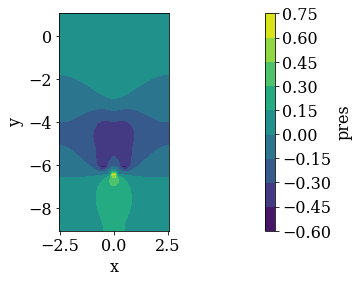

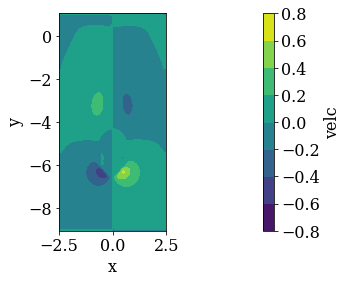

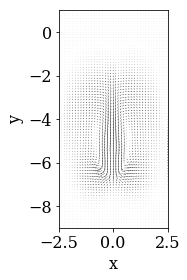

Level Set Mapping Time:  0.2793879508972168
------------ Time = 6.009999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.164465143259451e-13
Total poisson time : 0.0006978511810302734
Total INS time : 0.001798868179321289
Max, Min, U   : 0.6776942285745889, -0.677694228574589
Max, Min, V   : 0.40774706111721076, -1.35368270042788
Max, Min, P   : 1.5948670638976286, -1.4625931519206319
Max, Min, DIV : 1.3877787807814457e-15, -1.7763568394002505e-15


Level Set Mapping Time:  0.27938199043273926
------------ Time = 6.019999999999916 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.99389099895475e-13
Total poisson time : 0.0007231235504150391
Total INS time : 0.00174713134765625
Max, Min, U   : 0.6978563335054463, -0.6978563335054464
Max, Min, V   : 0.407686255069746, -1.3536183706217928
Max, Min, P   : 0.883064547011639, -0.7322710703203924
Max, Min, DIV : 1.4988010832439613e-15, -1.609823385706477e-15


Level Se

Level Set Mapping Time:  0.2995588779449463
------------ Time = 6.179999999999913 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.015066092849223e-13
Total poisson time : 0.0012722015380859375
Total INS time : 0.0024471282958984375
Max, Min, U   : 0.643455347007213, -0.6434553470072132
Max, Min, V   : 0.40756162115379374, -1.3495154363474984
Max, Min, P   : 0.8975644735808475, -1.3466977298529925
Max, Min, DIV : 1.7763568394002505e-15, -1.7486012637846216e-15


Level Set Mapping Time:  0.2925698757171631
------------ Time = 6.1899999999999125 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.1684778087358533e-13
Total poisson time : 0.0006799697875976562
Total INS time : 0.001706838607788086
Max, Min, U   : 0.6453974146958966, -0.6453974146958968
Max, Min, V   : 0.4076419928021283, -1.349397769617727
Max, Min, P   : 0.9435388171098831, -1.196796656742377
Max, Min, DIV : 1.7208456881689926e-15, -1.8318679906315083e-15


L

Level Set Mapping Time:  0.29965901374816895
------------ Time = 6.349999999999909 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9322038332084404e-13
Total poisson time : 0.0010750293731689453
Total INS time : 0.002248048782348633
Max, Min, U   : 0.6407163993973918, -0.6407163993973918
Max, Min, V   : 0.40804585077722183, -1.3447866123157866
Max, Min, P   : 0.3321499532516714, -0.7037516050142743
Max, Min, DIV : 1.7069679003611782e-15, -1.3600232051658168e-15


Level Set Mapping Time:  0.2942631244659424
------------ Time = 6.359999999999909 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.9566770271532803e-13
Total poisson time : 0.0007228851318359375
Total INS time : 0.0017690658569335938
Max, Min, U   : 0.6373623134403064, -0.6373623134403064
Max, Min, V   : 0.40807766763584175, -1.3444271568859476
Max, Min, P   : 0.9345533292576091, -0.6151489237757268
Max, Min, DIV : 1.4988010832439613e-15, -1.6653345369377348e-1

Level Set Mapping Time:  0.31130290031433105
------------ Time = 6.519999999999905 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.9453418927768786e-13
Total poisson time : 0.0007920265197753906
Total INS time : 0.0018589496612548828
Max, Min, U   : 0.6992197317635778, -0.6992197317635775
Max, Min, V   : 0.4083538630755234, -1.339689766167542
Max, Min, P   : 0.913833291637347, -0.7057049154536013
Max, Min, DIV : 1.6896206656014101e-15, -1.5543122344752192e-15


Level Set Mapping Time:  0.2952241897583008
------------ Time = 6.529999999999905 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.7604323767690703e-13
Total poisson time : 0.000743865966796875
Total INS time : 0.0018558502197265625
Max, Min, U   : 0.6627683886473594, -0.6627683886473592
Max, Min, V   : 0.40834638572743065, -1.3392742464000233
Max, Min, P   : 1.3142312314152025, -0.6201640311838013
Max, Min, DIV : 1.5543122344752192e-15, -1.5543122344752192e-15



Level Set Mapping Time:  0.35999584197998047
------------ Time = 6.689999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.256989341439036e-13
Total poisson time : 0.0008420944213867188
Total INS time : 0.0020399093627929688
Max, Min, U   : 0.6476331831844201, -0.64763318318442
Max, Min, V   : 0.4086234996660644, -1.334967020360929
Max, Min, P   : 0.969776112434457, -1.178394371778041
Max, Min, DIV : 1.7416623698807143e-15, -1.7763568394002505e-15


Level Set Mapping Time:  0.2889218330383301
------------ Time = 6.699999999999902 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.483989286092313e-13
Total poisson time : 0.0006897449493408203
Total INS time : 0.001714944839477539
Max, Min, U   : 0.6485361857736852, -0.6485361857736852
Max, Min, V   : 0.40860665322576817, -1.334485925498986
Max, Min, P   : 0.5231094126149427, -0.9832853623933993
Max, Min, DIV : 1.4710455076283324e-15, -1.4432899320127035e-15


Level

Level Set Mapping Time:  0.28351402282714844
------------ Time = 6.859999999999898 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8687524676694026e-13
Total poisson time : 0.0006849765777587891
Total INS time : 0.0017101764678955078
Max, Min, U   : 0.6405783935210719, -0.640578393521072
Max, Min, V   : 0.40873756556668317, -1.3294162341458609
Max, Min, P   : 0.9529913843606479, -0.6096390580301382
Max, Min, DIV : 1.4988010832439613e-15, -1.5543122344752192e-15


Level Set Mapping Time:  0.28272104263305664
------------ Time = 6.869999999999898 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.839017142140661e-13
Total poisson time : 0.0006840229034423828
Total INS time : 0.0017061233520507812
Max, Min, U   : 0.6363332775840297, -0.6363332775840298
Max, Min, V   : 0.40879769683676187, -1.3290212769664334
Max, Min, P   : 0.8186186911044615, -0.5435887291565328
Max, Min, DIV : 1.5265566588595902e-15, -1.27675647831893e-15


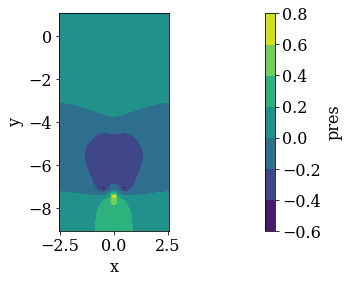

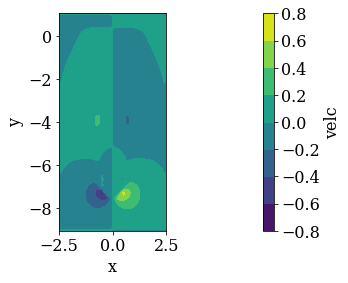

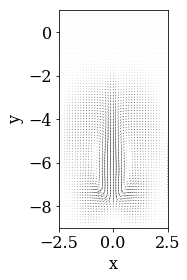

Level Set Mapping Time:  0.28429603576660156
------------ Time = 7.009999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 4.662655120346653e-13
Total poisson time : 0.0006971359252929688
Total INS time : 0.0017490386962890625
Max, Min, U   : 0.6850734950872677, -0.6850734950872678
Max, Min, V   : 0.4089745870022679, -1.325089260888109
Max, Min, P   : 1.707162672979038, -1.3829340653787028
Max, Min, DIV : 1.734723475976807e-15, -1.7763568394002505e-15


Level Set Mapping Time:  0.2836129665374756
------------ Time = 7.019999999999895 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6341425511898076e-13
Total poisson time : 0.0006978511810302734
Total INS time : 0.0017578601837158203
Max, Min, U   : 0.7056176425098851, -0.7056176425098851
Max, Min, V   : 0.4090152986866524, -1.3248858519816582
Max, Min, P   : 0.9549468648273133, -0.6865289340406125
Max, Min, DIV : 1.7208456881689926e-15, -1.8457457784393227e-15


L

Level Set Mapping Time:  0.2823810577392578
------------ Time = 7.179999999999891 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.4507475872131944e-13
Total poisson time : 0.0006959438323974609
Total INS time : 0.0017137527465820312
Max, Min, U   : 0.6545926146097224, -0.6545926146097223
Max, Min, V   : 0.4093220448553839, -1.3210366868440941
Max, Min, P   : 0.9799908173446251, -1.306078653991202
Max, Min, DIV : 1.6930901125533637e-15, -1.5265566588595902e-15


Level Set Mapping Time:  0.28234219551086426
------------ Time = 7.189999999999891 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.757677181414527e-13
Total poisson time : 0.0007190704345703125
Total INS time : 0.0017747879028320312
Max, Min, U   : 0.6566291881564997, -0.6566291881564996
Max, Min, V   : 0.40935413895906275, -1.3209523441416529
Max, Min, P   : 1.0345268718769238, -1.1535154853077019
Max, Min, DIV : 1.4988010832439613e-15, -1.609823385706477e-15



Level Set Mapping Time:  0.27425098419189453
------------ Time = 7.349999999999888 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8958943081066794e-13
Total poisson time : 0.0006840229034423828
Total INS time : 0.0017061233520507812
Max, Min, U   : 0.656839143532042, -0.6568391435320418
Max, Min, V   : 0.40958462370065196, -1.3164571387225783
Max, Min, P   : 0.41397108747535716, -0.6712247950817664
Max, Min, DIV : 1.7763568394002505e-15, -1.5543122344752192e-15


Level Set Mapping Time:  0.2867128849029541
------------ Time = 7.3599999999998875 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.736588111454068e-13
Total poisson time : 0.0007250308990478516
Total INS time : 0.0017659664154052734
Max, Min, U   : 0.6534880370873102, -0.65348803708731
Max, Min, V   : 0.4095769048698179, -1.3161678566070014
Max, Min, P   : 1.0201619022802744, -0.5995901136376363
Max, Min, DIV : 1.609823385706477e-15, -1.6653345369377348e-15



Level Set Mapping Time:  0.2824270725250244
------------ Time = 7.519999999999884 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.61429722751196e-13
Total poisson time : 0.0007169246673583984
Total INS time : 0.0017468929290771484
Max, Min, U   : 0.7316692607651782, -0.7316692607651782
Max, Min, V   : 0.40984695040815655, -1.31175135335429
Max, Min, P   : 1.056100145813741, -0.6772310337581605
Max, Min, DIV : 1.6653345369377348e-15, -1.6653345369377348e-15


Level Set Mapping Time:  0.2815361022949219
------------ Time = 7.529999999999884 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.6071199264625483e-13
Total poisson time : 0.0006902217864990234
Total INS time : 0.0017352104187011719
Max, Min, U   : 0.6940378377523546, -0.6940378377523546
Max, Min, V   : 0.40988983605729734, -1.3114108709029735
Max, Min, P   : 1.47872386856708, -0.5834928497132414
Max, Min, DIV : 1.4988010832439613e-15, -1.609823385706477e-15


Leve

Level Set Mapping Time:  0.28099918365478516
------------ Time = 7.6899999999998805 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.7731890855735163e-13
Total poisson time : 0.000720977783203125
Total INS time : 0.0017538070678710938
Max, Min, U   : 0.6934686637061516, -0.6934686637061518
Max, Min, V   : 0.410569819130286, -1.3071960958193762
Max, Min, P   : 1.2027056634373303, -1.156986583467719
Max, Min, DIV : 1.5681900222830336e-15, -1.7416623698807143e-15


Level Set Mapping Time:  0.2767050266265869
------------ Time = 7.69999999999988 ---------------
Number of poisson iterations    : None
Final poisson residual : 3.2288527460534993e-13
Total poisson time : 0.0006878376007080078
Total INS time : 0.0017039775848388672
Max, Min, U   : 0.6947968413383288, -0.6947968413383291
Max, Min, V   : 0.4106084572850412, -1.306806237026443
Max, Min, P   : 0.7208986645158058, -0.9650089449173538
Max, Min, DIV : 1.7763568394002505e-15, -1.609823385706477e-15


Le

Level Set Mapping Time:  0.2967967987060547
------------ Time = 7.859999999999877 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8477222712976115e-13
Total poisson time : 0.0006897449493408203
Total INS time : 0.0017337799072265625
Max, Min, U   : 0.7086562314768223, -0.7086562314768222
Max, Min, V   : 0.4153435084597751, -1.3021612461296685
Max, Min, P   : 1.2650011514743666, -0.6159075595315253
Max, Min, DIV : 1.6930901125533637e-15, -1.7208456881689926e-15


Level Set Mapping Time:  0.2807629108428955
------------ Time = 7.869999999999877 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8896439863808673e-13
Total poisson time : 0.0007660388946533203
Total INS time : 0.0019147396087646484
Max, Min, U   : 0.7044645826726302, -0.7044645826726301
Max, Min, V   : 0.4164286342581526, -1.3016729879631386
Max, Min, P   : 1.1063260173284342, -0.5537295782143599
Max, Min, DIV : 1.5543122344752192e-15, -1.609823385706477e-15



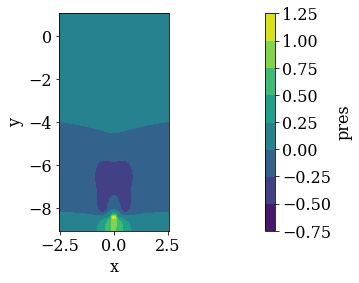

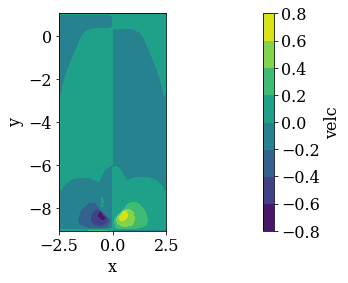

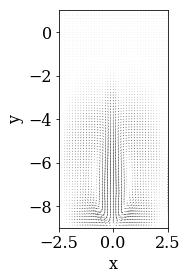

Level Set Mapping Time:  0.2751791477203369
------------ Time = 8.009999999999874 ---------------
Number of poisson iterations    : None
Final poisson residual : 5.269307389321019e-13
Total poisson time : 0.0006887912750244141
Total INS time : 0.0017228126525878906
Max, Min, U   : 0.827077486132843, -0.827077486132843
Max, Min, V   : 0.4319351116518393, -1.2980064118506098
Max, Min, P   : 2.3063081892368724, -1.435322698412494
Max, Min, DIV : 1.7763568394002505e-15, -1.7763568394002505e-15




In [3]:
while scalars.time <= scalars.tmax:
    
    imbound.map_to_grid()

    ins.advance()

    for particle in particles:
        particle.advance()

    scalars.advance()
    
    # Display stats
    if scalars.nstep % 1 == 0:
        print("Level Set Mapping Time: ",imbound._mapping_time)
        flowx.io.display_stats(scalars) 
        
    if scalars.nstep % 100 == 0:
        flowx.io.plot_contour(gridc, 'pres')
        flowx.io.plot_contour(gridx, 'velc')
        flowx.io.plot_vector(gridx,gridy,'velc')
              

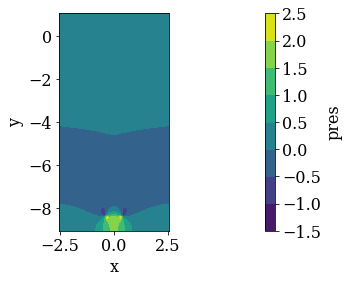

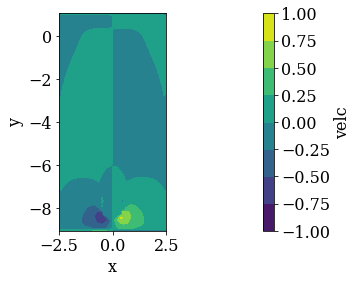

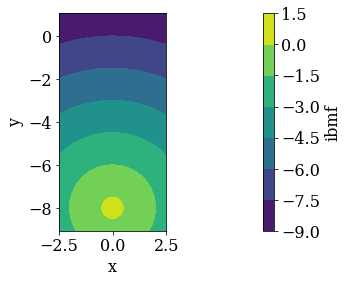

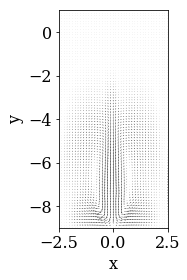

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'ibmf')
flowx.io.plot_vector(gridx,gridy,'velc')